# Visualization Descriptive Statistics

Of the 4 involved data sets a collection of statistics is created to gain a first insight.
For this, we extract named entities, words and characters from the queries. Accordingly, 4 subcategories arise:
- queries
- named entities
- words
- characters 

For each category, the length is measured in terms of all sublevels. E.g. the length of a named entity can be described as the number of words or the number of characters. Alongside, the items of each subcategory are sorted with respect to their frequency to check for specific liguistic laws like zipfs's law. Essentially, we obtain a thorough set of statistics.

### 1. Zipf's law 
Zipf's law states that frequencies of words from a document follow an inversely proportional distribution to their rank when sorted in descending order. To get a more comprehensive comparison between the data sets, we check on zipf's law for all subcategories.
 

To get started, lets define some configuration for our visualization:

In [1]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# combine all plots in one figure or plot each analysis in a single figure
single_plot = True
# single_plot = False

# save visualization or not
# save_vis: bool = False
save_vis: bool = True
plot_format: str = 'pdf'

# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

analyses = []
# set analysis that should be visualized
# analyses.append('query-frequencies')
analyses.append('extract-named-entities')
analyses.append('extract-words')
# analyses.append('extract-chars')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False

take_new_directory = True
# take_new_directory = False

col = ['count()']

Load the specified data:

In [2]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary
        if analysis_name == 'query-frequencies':
            paths = {f"{name}": _get_results_paths(name, analysis_name, cleaned_aql=take_new_directory) for name in [
                "aol", "aql"]}
        else:
            paths = {f"{name}": _get_results_paths(name, analysis_name, cleaned_aql=take_new_directory) for name in [
                "aol", "aql", "ms-marco", "orcas"]}
        # iterate over datasets and create visualization
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths, test_data=test_data, cols=col)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")
        label=["AOL", "AQL", "MS-MARCO", "ORCAS"]
        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name, take_new_directory)
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths, test_data=test_data, cols=col)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-extract-named-entities-special
Loading data from aol dataset
aol loaded in 4.5404492855072025 min
Loading data from aql dataset
aql loaded in 0.5481925725936889 min
Loading data from ms-marco dataset
ms-marco loaded in 6.198986844221751 min
Loading data from orcas dataset
orcas loaded in 3.5610726873079934 min
/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-extract-words-special
Loading data from aol dataset
aol loaded in 0.37363473176956175 min
Loading data from aql dataset
aql loaded in 1.8304462552070617 min
Loading data from ms-marco dataset
ms-marco loaded in 0.30568981568018594 min
Loading data from orcas dataset
orcas loaded in 0.34932706753412884 min


Start the visualization:

Visualizing extract-named-entities
{'dataset-col-x': 'entity', 'dataset-col-y': 'count()', 'x-label': 'Rank', 'y-label': 'Frequency', 'x-lim': None, 'y-lim': None, 'title': "Zipf's Law Named Entities"}
Visualizing extract-words
{'dataset-col-x': 'word', 'dataset-col-y': 'count()', 'x-label': 'Rank', 'y-label': 'Frequency', 'x-lim': None, 'y-lim': None, 'title': "Zipf's Law Words"}


/tmp/ipykernel_86981/2342289174.py:111: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_86981/2342289174.py:119: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(vis_dir.joinpath(f"all.{plot_format}"), format=plot_format)


Visualization finished


/home/benjamin/studium/masterarbeit/thesis-schneg/src/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/benjamin/studium/masterarbeit/thesis-schneg/src/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


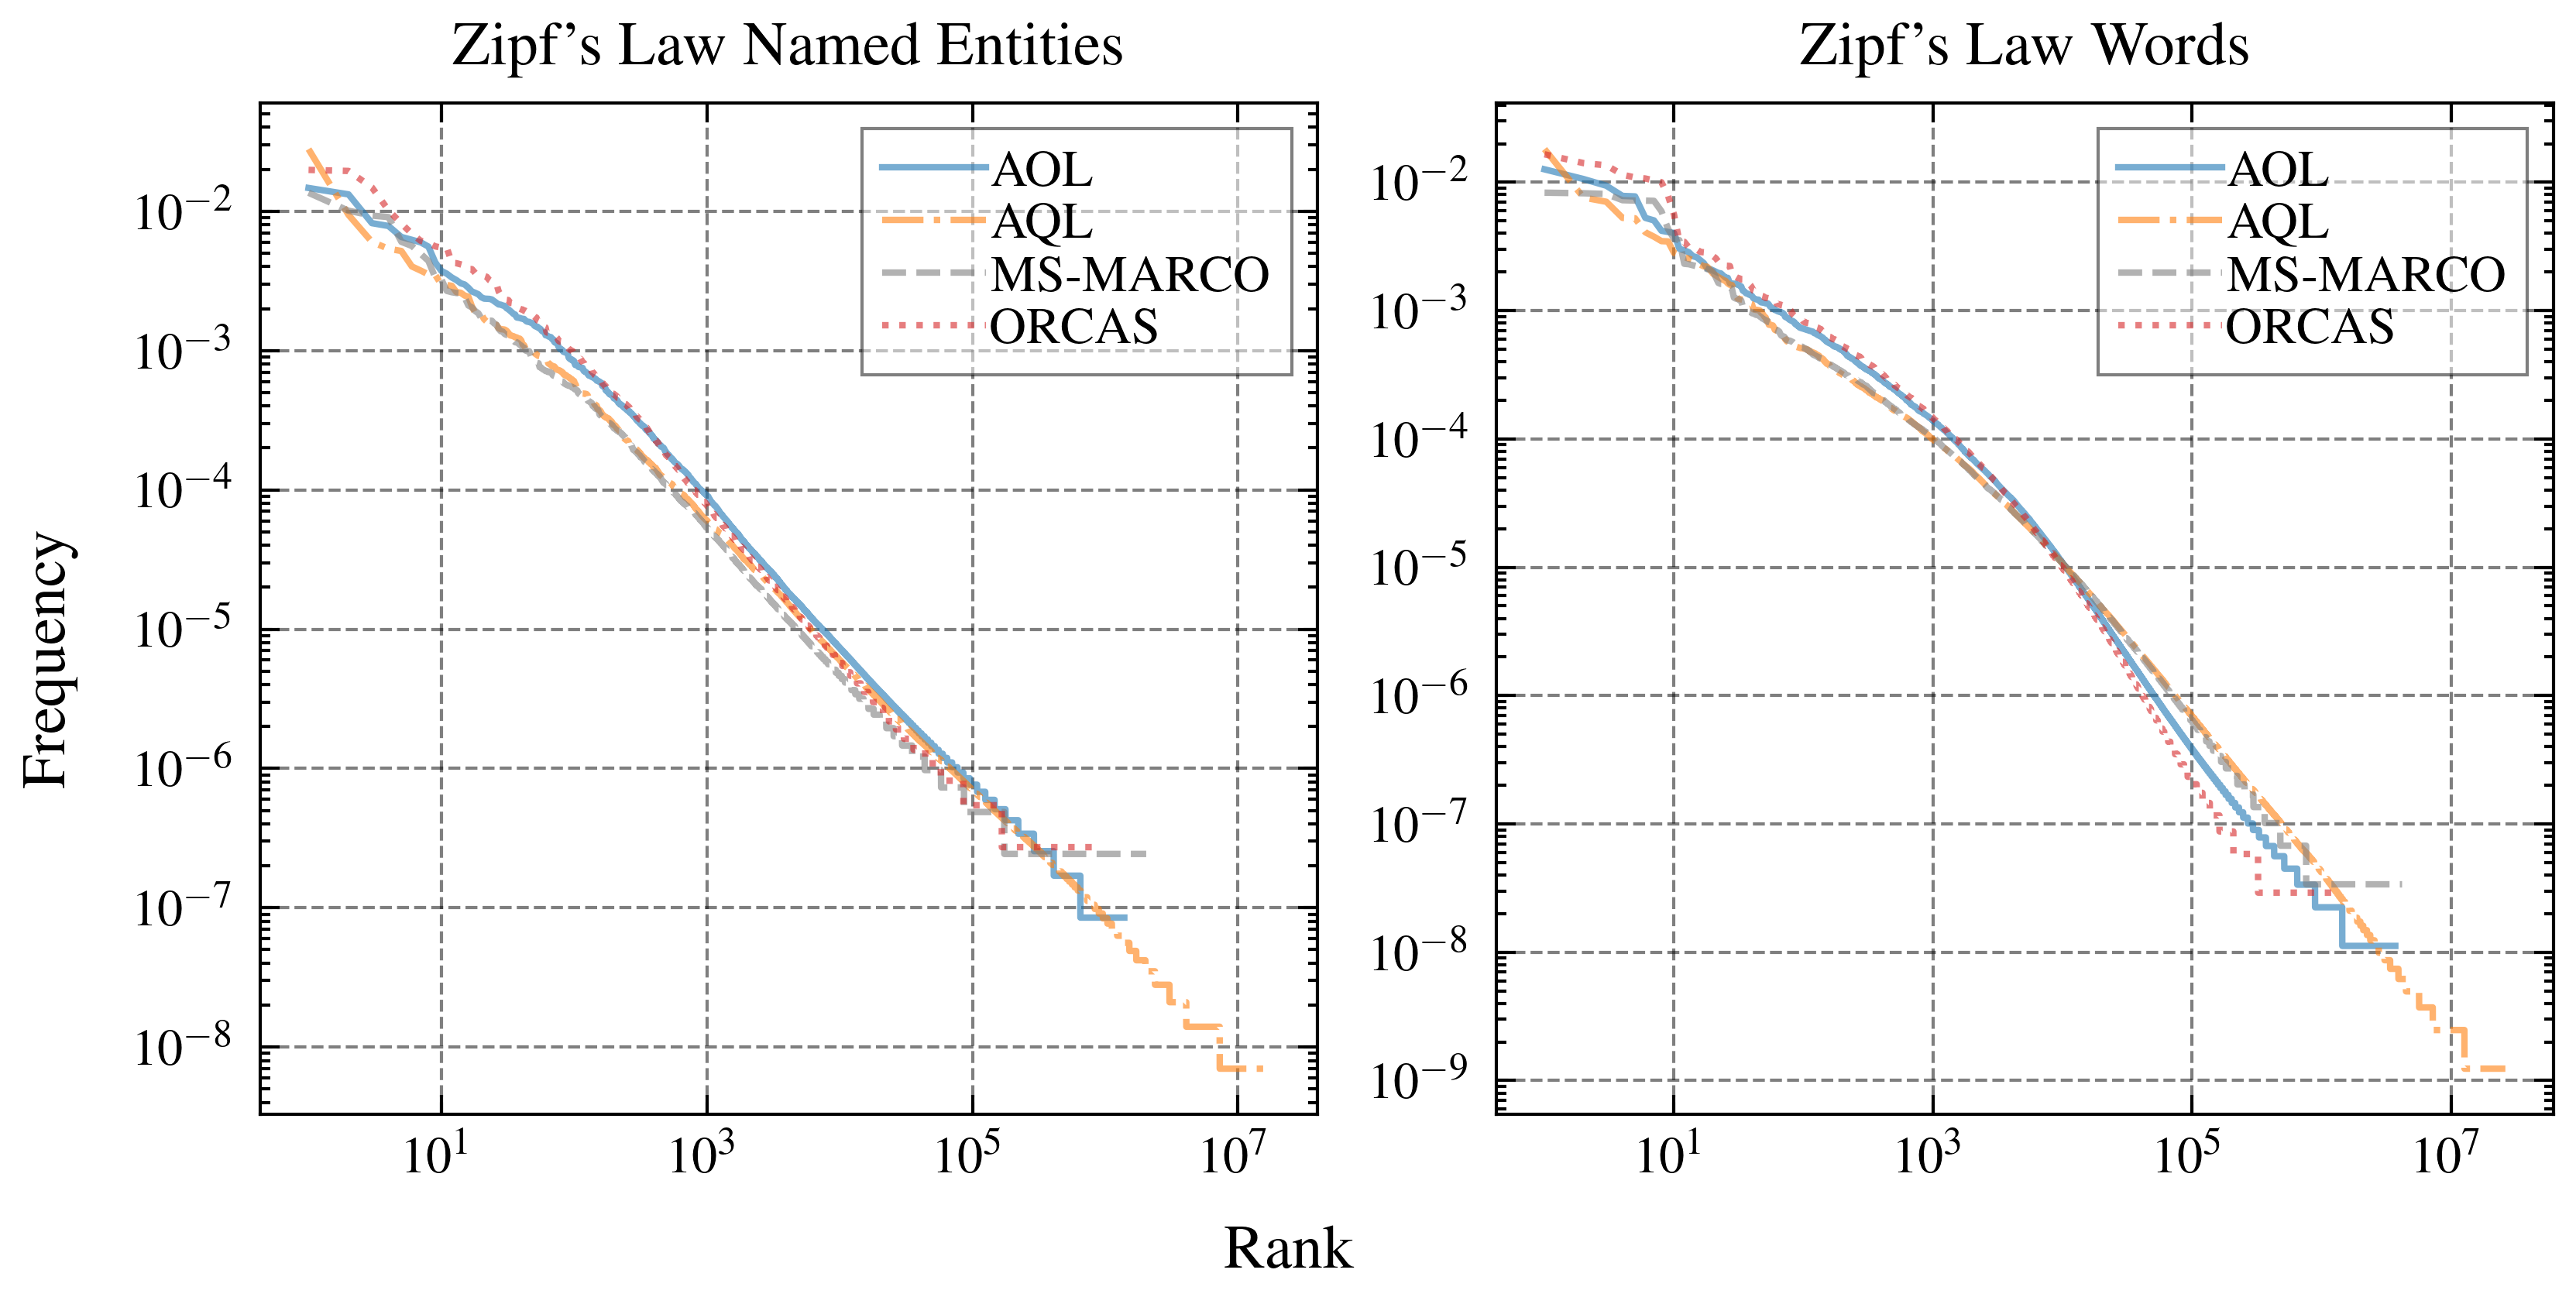

In [3]:
from thesis_schneg.vis_modules import log_plot
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib
import scienceplots

# save_vis = False
save_vis = True

analyses_params = []
for analysis_name in analyses:
    # load visualization parametes into dictionary
    if analysis_name == 'query-frequencies':
        vis_params = {"dataset-col-x": "serp_query_text_url", "dataset-col-y": "count()", "x-label": "Rank",
                      "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law Queries"}
    elif analysis_name == 'extract-named-entities':
        vis_params = {"dataset-col-x": "entity", "dataset-col-y": "count()", "x-label": "Rank",
                      "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law Named Entities"}
    elif analysis_name == 'extract-words':
        vis_params = {"dataset-col-x": "word", "dataset-col-y": "count()", "x-label": "Rank",
                      "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law Words"}
    elif analysis_name == 'extract-chars':
        vis_params = {"dataset-col-x": "char", "dataset-col-y": "count()", "x-label": "Rank",
                      "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law Characters"}
    analyses_params.append(vis_params)


base_path = "/home/benjamin/studium/masterarbeit/thesis-schneg/plots/"
if take_new_directory:
    base_path = base_path + "updated_plots/"

# set path to save visualization
if len(analyses) > 1:
    if single_plot:
        vis_dir = Path(
            f"{base_path}{analyses[0]}-and-{analyses[1]}-single")
    else:
        vis_dir = Path(
            f"{base_path}{analyses[0]}-and-{analyses[1]}")
else:
    if single_plot:
        vis_dir = Path(
            f"{base_path}{analyses[0]}-single")
    else:
        vis_dir = Path(
            f"{base_path}{analyses[0]}")

# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)


# use science style for plots from scienceplots library
plt.style.use(["science", "grid", "ieee"])

# create subplots for each dataset
# set size of plot
textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio * 0.9
if single_plot:
    fig, ax = plt.subplots(ncols=len(analyses), nrows=1,
                           figsize=(width*1.03, 4*height/5))
else:
    fig, ax = plt.subplots(ncols=len(analyses), nrows=4,
                           figsize=(width, 2*height))

for i in range(len(analyses)):
    result_data = analysis_data[i]
    vis_params = analyses_params[i]
    print(f"Visualizing {analyses[i]}")
    print(vis_params)
    
    # create visualization for all data sets if dataset is not specified
    multi = True
    # color palette for datasets
    color = ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']
    linestyles = ["solid", "dashdot", "dashed", "dotted"]
    # counter for datasets
    cnt_datasets = 0
    # iterate over datasets and create visualization
    for name, vis_data in result_data.items():
        if normalize_data:
            vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                vis_data[vis_params["dataset-col-y"]].sum()
        # apply specific visualization function
        if not single_plot:
            if len(analyses) > 1:
                fig, ax[cnt_datasets, i] = log_plot(data=vis_data, subplots=(fig, ax[cnt_datasets, i]),
                                                    vis_params=vis_params, label=label[cnt_datasets], linestyle=linestyles[cnt_datasets], multi=multi, color=color[cnt_datasets])
            else:
                fig, ax[cnt_datasets] = log_plot(data=vis_data, subplots=(fig, ax[cnt_datasets]),
                                                    vis_params=vis_params, label=name.upper(), multi=multi, linestyle=linestyles[cnt_datasets], color=color[cnt_datasets])  # , color=color[cnt_datasets]
        else:
            if len(analyses) > 1:
                fig, ax[i] = log_plot(data=vis_data, subplots=(fig, ax[i]),
                                        vis_params=vis_params, label=label[cnt_datasets], multi=multi, linestyle=linestyles[cnt_datasets], color=color[cnt_datasets])
            else:
                fig, ax = log_plot(data=vis_data, subplots=(fig, ax),
                                    vis_params=vis_params, label=name.upper(), multi=multi, linestyle=linestyles[cnt_datasets], color=color[cnt_datasets])  # , color=color[cnt_datasets]
        cnt_datasets += 1



if dataset is None:
    fig.supxlabel(analyses_params[0]["x-label"], y=0.05)
    fig.supylabel(analyses_params[0]["y-label"])
# make layout tight
plt.tight_layout()

if save_vis:
    # delete old plot
    for file in vis_dir.iterdir():
        if file.is_file() and file.name.endswith(f'.{plot_format}'):
            file.unlink()

    fig.savefig(vis_dir.joinpath(f"all.{plot_format}"), format=plot_format)

print("Visualization finished")

### 2. Length Plots

We plot the lengths of queries and their previously defined subcategories. For the sake of clarity we plot the results of each data set seperately.

Visualization configurations:

In [7]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# save visualization or not
# save_vis: bool = False
save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

# plot cleaned aol data or not
cleaned_aol = False
# cleaned_aol = True

struc_level = []
# struc_level.append('queries')
# struc_level.append('named-entities')
# struc_level.append('words')

base_analyses = []
# base_analyses.append('character-count-frequencies') #-{struc}
# base_analyses.append('word-count-frequencies')
# base_analyses.append('entity-count-frequencies')

analyses = []
for item in base_analyses:
    for struc in struc_level:
        analyses.append(f'{item}-{struc}')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False

take_new_directory = True #takes new directory for plots and takes cleaned aql
# take_new_directory = False 


In [8]:
analyses = []
analyses.append('character-count-frequencies-words') #-{struc}
analyses.append('entity-count-frequencies-queries') #-{struc}


In [9]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pathlib import Path
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary
        paths = {f"{name}": _get_results_paths(name, analysis_name, cleaned_aql=take_new_directory) for name in [
            "aol", "aql", "ms-marco", "orcas"]}
        if analysis_name == 'character-count-frequencies-words' and cleaned_aol:
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-words-character-count-frequencies-special")
            paths["aol"] = [path for path in base_path.iterdir(
        )]
        if analysis_name == 'character-count-frequencies-queries':
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-get-char-count-special")
            paths["aql"] = [path for path in base_path.iterdir(
        )]
            
        # iterate over datasets and create visualization
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths, test_data=test_data)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")
        color = ['blue', 'orange', 'red', 'purple']
        label=["AOL", "AQL", "MS-MARCO", "ORCAS"]
        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name, cleaned_aql=take_new_directory)
        if analysis_name == 'character-count-frequencies-words' and cleaned_aol:
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-words-character-count-frequencies-special")
            result_paths = [path for path in base_path.iterdir(
        )]
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

aql-character-count-frequencies-words-special
Loading data from aol dataset
aol loaded in 0.10962589581807454 min
Loading data from aql dataset
aql loaded in 0.17081449031829835 min
Loading data from ms-marco dataset
ms-marco loaded in 0.06113776365915934 min
Loading data from orcas dataset
orcas loaded in 0.06508017381032308 min
aql-entity-count-frequencies-queries-special
Loading data from aol dataset
aol loaded in 0.006467517217000326 min
Loading data from aql dataset
aql loaded in 0.02886586586634318 min
Loading data from ms-marco dataset
ms-marco loaded in 0.01332168181737264 min
Loading data from orcas dataset
orcas loaded in 0.011980287233988444 min


In [10]:
## for character-count-frequencies-words + entity-count-frequencies-queries
analyses_params = []
vis_params = {"dataset-col-x": "character-count", "dataset-col-y": "count()", "x-label": "Count",
              "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Character per Word"}
analyses_params.append(vis_params)
vis_params = {"dataset-col-x": "entity-count", "dataset-col-y": "count()", "x-label": "Count",
              "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Named Entity per Query"}
analyses_params.append(vis_params)


Visualizing entity-count-frequencies-queries
[{'dataset-col-x': 'character-count', 'dataset-col-y': 'count()', 'x-label': 'Count', 'y-label': 'Frequency', 'x-lim': None, 'y-lim': None, 'title': 'Character per Word'}, {'dataset-col-x': 'entity-count', 'dataset-col-y': 'count()', 'x-label': 'Count', 'y-label': 'Frequency', 'x-lim': None, 'y-lim': None, 'title': 'Named Entity per Query'}]
Visualizing entity-count-frequencies-queries
[{'dataset-col-x': 'character-count', 'dataset-col-y': 'count()', 'x-label': 'Count', 'y-label': 'Frequency', 'x-lim': [-1, 32.25], 'y-lim': None, 'title': 'Character per Word'}, {'dataset-col-x': 'entity-count', 'dataset-col-y': 'count()', 'x-label': 'Count', 'y-label': 'Frequency', 'x-lim': None, 'y-lim': None, 'title': 'Named Entity per Query'}]


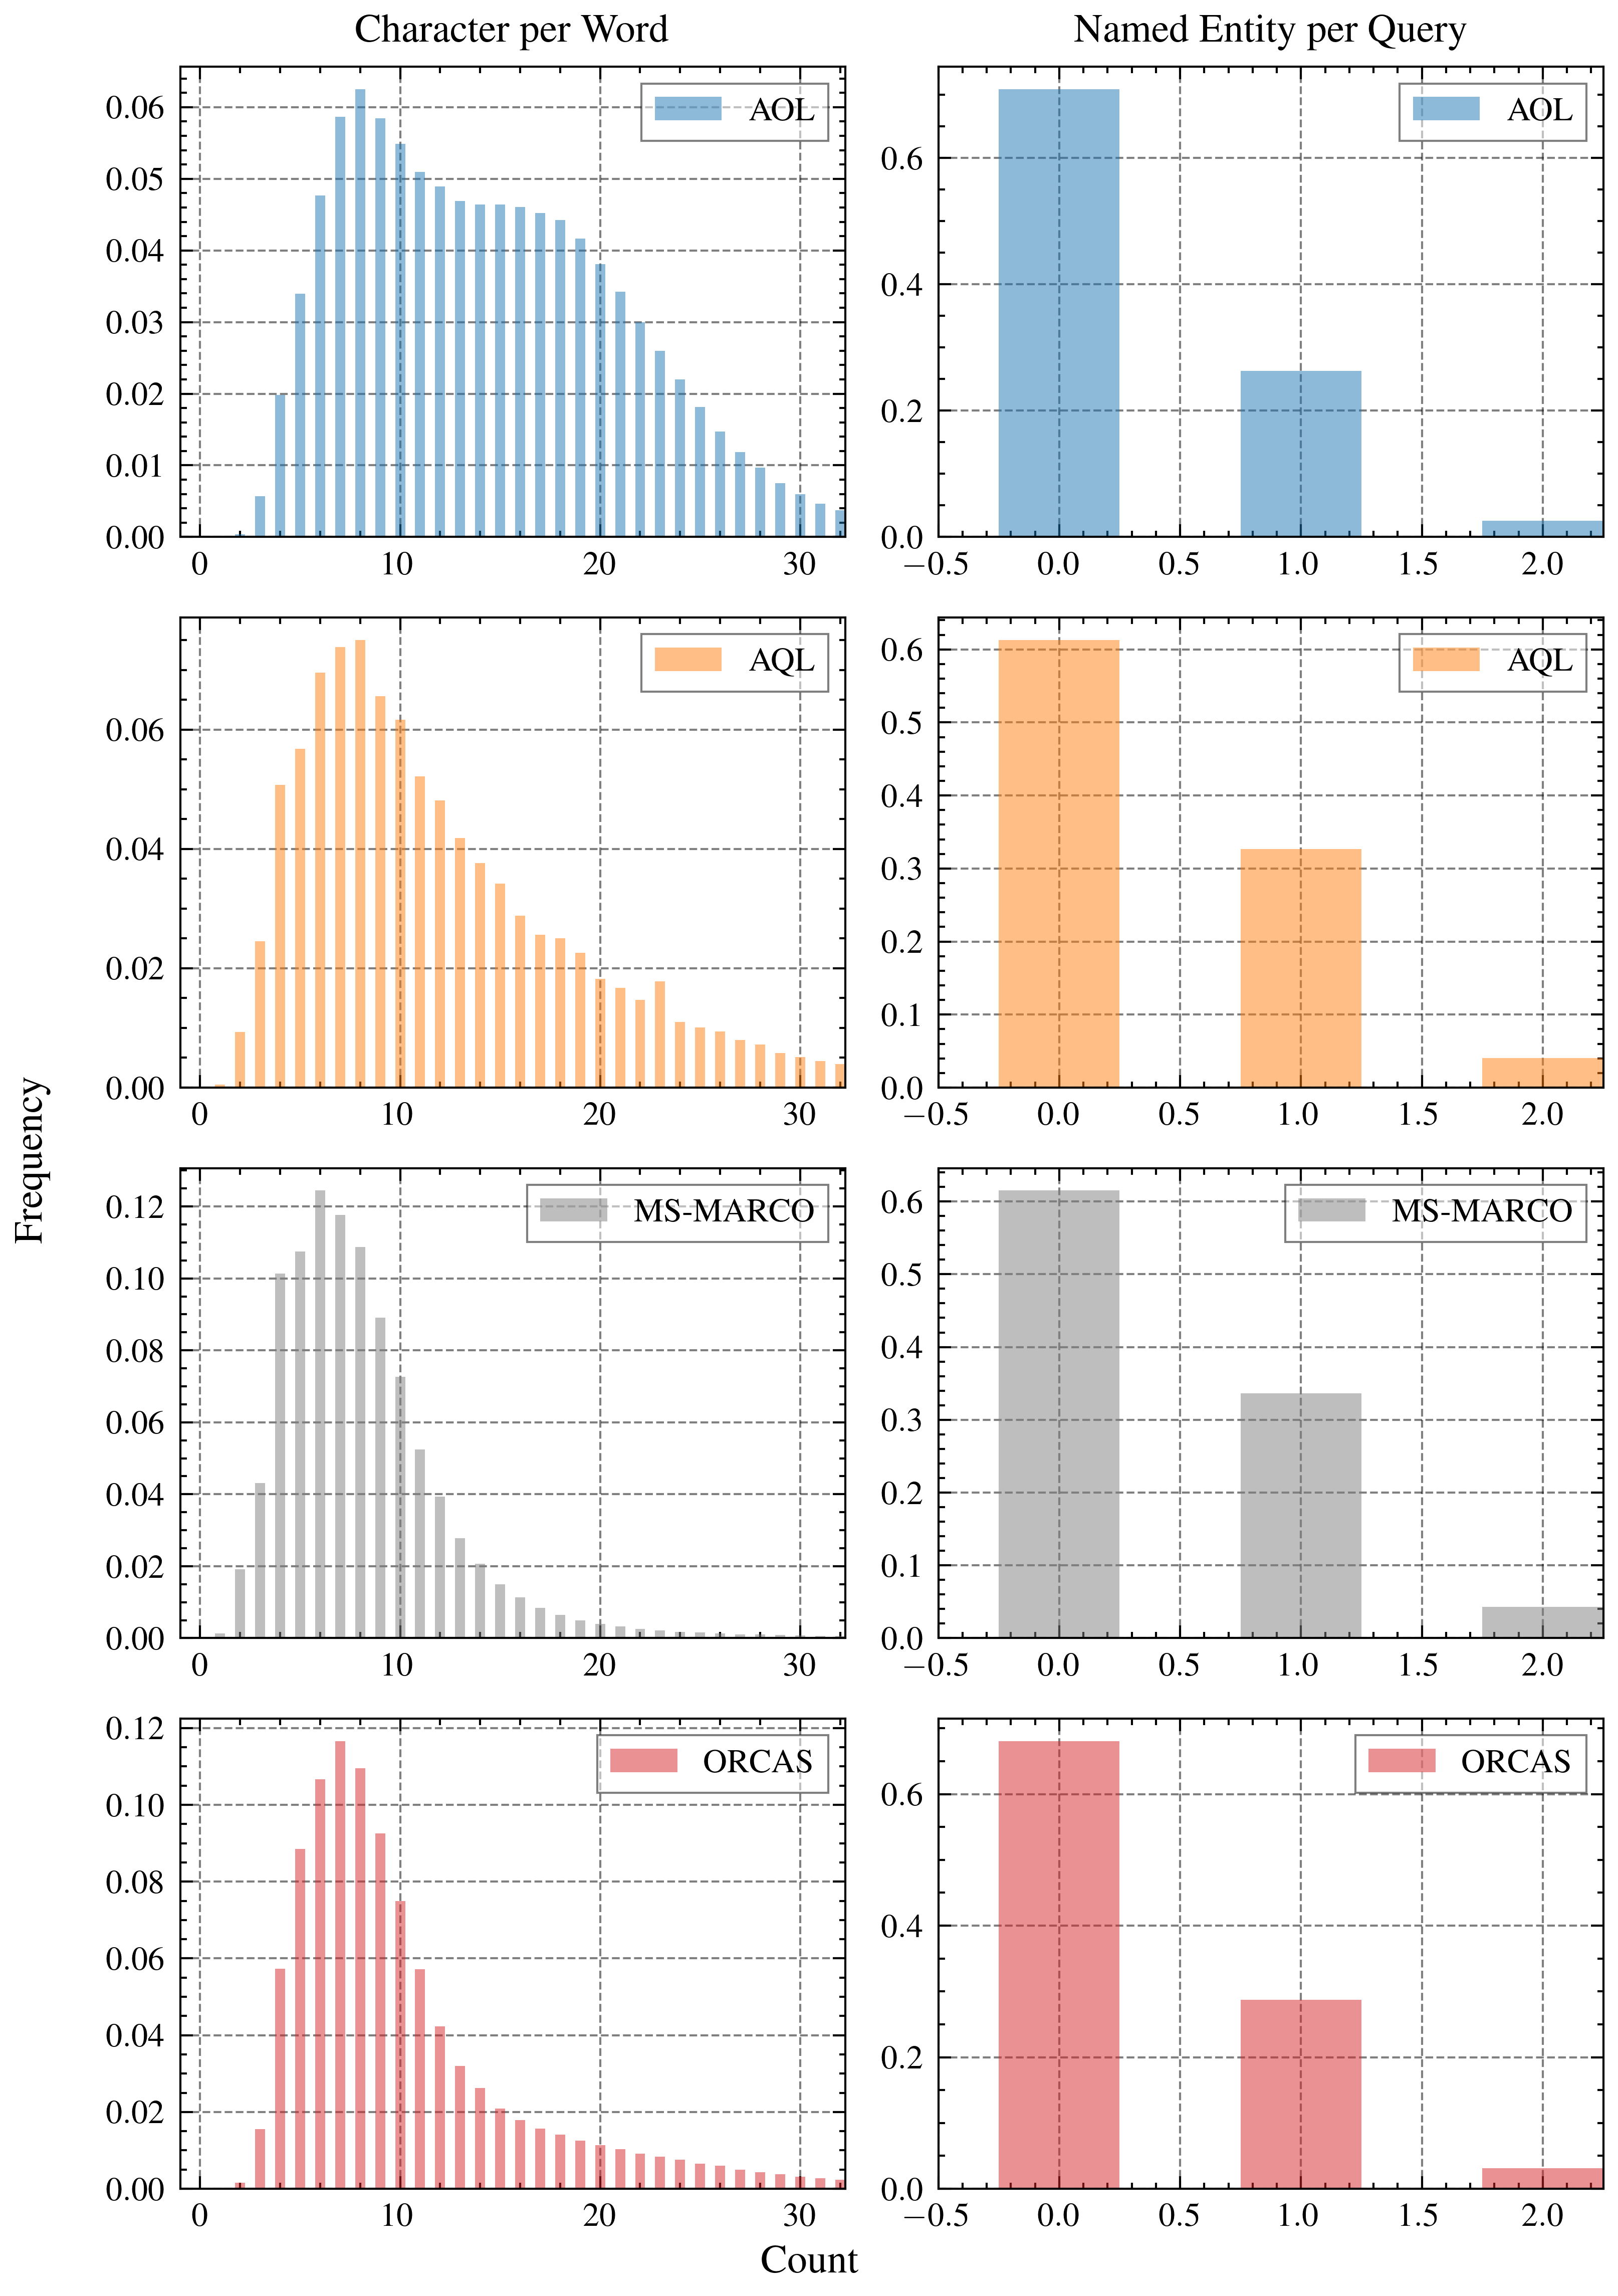

In [11]:
from thesis_schneg.vis_modules import bar_plot, get_xlim
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib
import scienceplots

# save_vis: bool = False
save_vis: bool = True

# analyses_params = []

# for item in base_analyses:
#     for struc in struc_level:
#         if struc == 'queries':
#             sub_title = "Query"
#         elif struc == 'named-entities':
#             sub_title = "Named Entity"
#         elif struc == 'words':
#             sub_title = "Word"

#         # load visualization parametes into dictionary
#         if f"{item}-{struc}" == f'character-count-frequencies-{struc}':
#             vis_params = {"dataset-col-x": "character-count", "dataset-col-y": "count()", "x-label": "Count", "y-label": "Frequency", "x-lim": [0,10], "y-lim": None, "title": f"Characters per {sub_title}"}
#         elif f"{item}-{struc}" == f'word-count-frequencies-{struc}':
#             vis_params = {"dataset-col-x": "word-count", "dataset-col-y": "count()", "x-label": "Count", "y-label": "Frequency", "x-lim": [0,10], "y-lim": None, "title": f"Words per {sub_title}"}
#         elif f"{item}-{struc}" == f'entity-count-frequencies-{struc}':
#             vis_params = {"dataset-col-x": "entity-count", "dataset-col-y": "count()", "x-label": "Count", "y-label": "Frequency", "x-lim": [0,10], "y-lim": None, "title": f"Named Entities per {sub_title}"}
#         analyses_params.append(vis_params)


base_path = "/home/benjamin/studium/masterarbeit/thesis-schneg/plots/"
if take_new_directory:
    base_path = base_path + "updated_plots/"
# set path to save visualization
if len(analyses) > 1:
    vis_dir = Path(
        f"{base_path}{analyses[0]}-and-{analyses[1]}")
else:
    vis_dir = Path(
        f"{base_path}{analyses[0]}")
    
# vis_dir = Path(
#         f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/extract-named-entities")

# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

# use science style for plots from scienceplots library
plt.style.use(["science", "grid", "ieee"])

# create subplots for each dataset
# set size of plot
textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

bar_width = 0.5 
if dataset is None:
    fig, ax = plt.subplots(ncols=len(analyses), nrows=4, figsize=(width, 2*height-0.1*height))
else:
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))
for i in range(len(analyses)):   
    result_data = analysis_data[i]
    vis_params = analyses_params[i]
    print(f"Visualizing {analysis_name}")
    print(analyses_params)
    # create visualization for all data sets if dataset is not specified
    if dataset is None:

        multi = True
        # color palette for datasets
        color =  ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']

        # get xlim
        xlims = []
        for name, vis_data in result_data.items():
            xlims.append(get_xlim(vis_data, vis_params, threshold=0.054, bar_width=bar_width)[1]) #0.054
        if max(xlims) > 10:
            vis_params["x-lim"] = [-1, max(xlims)]
        else:
            vis_params["x-lim"] = [0-bar_width, max(xlims)]
        # counter for datasets
        cnt_datasets = 0
        # iterate over datasets and create visualization
        for name, vis_data in result_data.items():
            # normalize data
            if normalize_data:
                vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                    vis_data[vis_params["dataset-col-y"]].sum()
            vis_data = vis_data.sort_values(vis_params["dataset-col-x"], ascending=True)
            # apply specific visualization function
            if len(analyses) > 1:
                fig, ax[cnt_datasets,i] = bar_plot(data=vis_data, subplots=(fig, ax[cnt_datasets,i]),
                                                vis_params=vis_params, label=label[cnt_datasets], multi=multi, color=color[cnt_datasets], bar_width=bar_width)
                if cnt_datasets == 0:
                    ax[cnt_datasets,i].set_title(vis_params["title"])
            else:
                fig, ax[cnt_datasets] = bar_plot(data=vis_data, subplots=(fig, ax[cnt_datasets]),
                                                vis_params=vis_params, label=name.upper(), multi=multi, color=color[cnt_datasets], bar_width=bar_width) #, color=color[cnt_datasets]
                if cnt_datasets == 0:
                    ax[cnt_datasets].set_title(vis_params["title"])
            cnt_datasets += 1
            


    # create visualization for a specific data set:
    else: 
        multi = False 
        # get xlim
        xlims = []
        for name, vis_data in result_data.items():
            xlims.append(get_xlim(vis_data, vis_params, threshold=0.015, bar_width=bar_width)[1]) #0.054
        vis_params["x-lim"] = [0-bar_width, max(xlims)]

        if normalize_data:
            vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                    vis_data[vis_params["dataset-col-y"]].sum()
        
        vis_data = vis_data.sort_values(vis_params["dataset-col-x"], ascending=True)
        
        # modify title
        vis_params["title"] = f'{vis_params["title"]} ({dataset.upper()})'

        # set size of plot
        textwidth = 5.5129
        aspect_ratio = 6/8
        scale = 1.0
        width = textwidth * scale
        height = width * aspect_ratio

        # # create subplot for dataset
        # fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))

        # apply specific visualization function
        fig, ax = bar_plot(data=vis_data, subplots=(fig, ax),
                                                vis_params=vis_params, multi=multi,  bar_width=bar_width)
        
        # # make layout tight
        # plt.tight_layout()
        
        # # either save visualization or show it
        # if save_vis:
        #     fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
        # else:
        #     plt.show()

if dataset is None:
    fig.supxlabel(analyses_params[0]["x-label"], ha='center', va='center', y=0.033)
    fig.supylabel(analyses_params[0]["y-label"])
# make layout tight
plt.tight_layout()

plt.show()

plot_format = 'pdf'
if save_vis:
    if dataset is not None:
        output = dataset
        if analyses[0] == 'character-count-frequencies-words' and dataset == 'aol' and cleaned_aol:
            output = f"{output}-domains-cleaned"
    else:
        output = "all"
    # delete old plot
    for file in vis_dir.iterdir():
        if file.is_file() and file.name.endswith(f'.{plot_format}') and file.stem == output:
            file.unlink()

    fig.savefig(vis_dir.joinpath(f"{output}.{plot_format}"), format=plot_format)



In *Characters per Word* we can observe an anomaly at the distribution of the AOL log. Words of lengths 10 - 20 appear to be more frequent than in the other logs. Let's try to replicate this anomaly in the AQL log. For this, we filter the AQL by the timestamp of the queries. We only take words from queries of the year 2006, i.e. the release year of the AOL log.

In order to get the frequencies of word lengths in 2006 we need to run the following commands of our CLI:
1. `ray job submit --runtime-env ray-runtime-env.yml --no-wait -- python -m thesis_schneg analyser --dataset aql --analysis aql-get-words-2006 --read-concurrency 100 --concurrency 32 --write-concurrency 100 --memory-scaler 8 --batch-size 1024 `

2. `ray job submit --runtime-env ray-runtime-env.yml --no-wait -- python -m thesis_schneg analyser --dataset aql --analysis get-lengths --struc-level words --read-concurrency 100 --concurrency 32 --write-concurrency 100 --memory-scaler 8 --batch-size 1024 --read-dir /mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-aql-get-words-2006-all`

3. `ray job submit --runtime-env ray-runtime-env.yml --no-wait -- python -m thesis_schneg analyser --dataset aql --analysis character-count-frequencies --read-concurrency 100 --concurrency 32 --write-concurrency 100 --memory-scaler 8 --batch-size 1024 --read-dir /mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-get-lengths-words-special`  

In [ ]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# save visualization or not
# save_vis: bool = False
save_vis: bool = True

dataset: DatasetName = 'aql'

struc_level = []
struc_level.append('words')

base_analyses = []
base_analyses.append('character-count-frequencies') #-{struc}

analyses = []
for item in base_analyses:
    for struc in struc_level:
        analyses.append(f'{item}-{struc}')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False

: 

In [ ]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pathlib import Path
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:


    base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aql-character-count-frequencies-special")
    result_paths = [path for path in base_path.iterdir(
    )]
    start_time = time.time()
    print(f"Loading data from {dataset} dataset")
    result_data = {dataset: load_results(result_paths)}
    end_time = time.time()  
    print(f"{dataset} loaded in {(end_time - start_time)/60} min")
    analysis_data.append(result_data)   

: 

In [ ]:
analyses_params = []
vis_params = {"dataset-col-x": "character-count", "dataset-col-y": "count()", "x-label": "Count",
              "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Character per Word"}
analyses_params.append(vis_params)

: 

In [ ]:
from thesis_schneg.vis_modules import bar_plot, get_xlim
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib
import scienceplots

# latex rendering for matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)

# set path to save visualization

# vis_dir = Path(
#     f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/aql-{analyses[0]}-2006")

vis_dir = Path(
    f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/aql-{analyses[0]}-old-years")
    
# vis_dir = Path(
#         f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/extract-named-entities")

# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

# enable pgf format for matplotlib
if save_vis:
    matplotlib.use("pgf")
# use science style for plots from scienceplots library
plt.style.use(["science", "grid"])

# create subplots for each dataset
# set size of plot
textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

bar_width = 0.5 
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))
for i in range(len(analyses)):   
    result_data = analysis_data[i]
    vis_params = analyses_params[i]
    print(f"Visualizing {analysis_name}")
    print(analyses_params)
    # create visualization for all data sets if dataset is not specified



    # create visualization for a specific data set:
    multi = False 
    # get xlim
    xlims = []
    for name, vis_data in result_data.items():
        xlims.append(get_xlim(vis_data, vis_params, threshold=0.01, bar_width=bar_width)[1]) #0.054
    vis_params["x-lim"] = [0-bar_width, max(xlims)]

    if normalize_data:
        vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                vis_data[vis_params["dataset-col-y"]].sum()
    
    vis_data = vis_data.sort_values(vis_params["dataset-col-x"], ascending=True)
    
    # modify title
    vis_params["title"] = f'{vis_params["title"]} ({dataset.upper()})'

    # set size of plot
    textwidth = 5.5129
    aspect_ratio = 6/8
    scale = 1.0
    width = textwidth * scale
    height = width * aspect_ratio

    # # create subplot for dataset
    # fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))

    # apply specific visualization function
    fig, ax = bar_plot(data=vis_data, subplots=(fig, ax),
                                            vis_params=vis_params, multi=multi,  bar_width=bar_width)
    
    # # make layout tight
    # plt.tight_layout()
    
    # # either save visualization or show it
    # if save_vis:
    #     fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
    # else:
    #     plt.show()

if dataset is None:
    fig.supxlabel(analyses_params[0]["x-label"])
    fig.supylabel(analyses_params[0]["y-label"])
# make layout tight
plt.tight_layout()

# either save visualization or show it  
if save_vis:
    if dataset is not None:
        if analyses[0] == 'character-count-frequencies-words' and dataset == 'aol' and cleaned_aol:
            fig.savefig(vis_dir.joinpath(f"{dataset}-domains-cleaned.pgf"))
        else: 
            fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
    else:
        fig.savefig(vis_dir.joinpath("all.pgf"))
else:
    plt.show()




: 

: 